In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import functions


#### Reading the data

In [2]:
data = functions.read_data('data/transaction_dataset.csv')

In [3]:
data['FLAG'].unique()

array([0, 1])

In [4]:
# There are A LOT of columns so I will create a NEW DataFrame with fewer columns and work from there.
# FLAG is target.
new_data = data.drop(columns = ['Unnamed: 0','Index','Address',' ERC20 most sent token type',' ERC20_most_rec_token_type',
                           ' ERC20 min val rec',' ERC20 max val rec',' ERC20 max val sent contract',' ERC20 min val sent contract',' ERC20 avg val sent contract',
                           ' ERC20 min val sent',' ERC20 max val sent','max val sent','min val sent','max value received ','min value received',
                           'max val sent to contract','min value sent to contract',' ERC20 avg time between sent tnx',
                            'avg value sent to contract','total ether sent contracts',
                           ' ERC20 avg time between rec tnx',' ERC20 avg time between rec 2 tnx',' ERC20 avg time between contract tnx'],axis=1)

In [5]:
new_data.head()

,FLAG,Avg min between sent tnx,Avg min between received tnx,Time Diff between first and last (Mins),Sent tnx,Received Tnx,Number of Created Contracts,Unique Received From Addresses,Unique Sent To Addresses,avg val received,...,ERC20 total ether sent,ERC20 total Ether sent contract,ERC20 uniq sent addr,ERC20 uniq rec addr,ERC20 uniq sent addr.1,ERC20 uniq rec contract addr,ERC20 avg val rec,ERC20 avg val sent,ERC20 uniq sent token name,ERC20 uniq rec token name
0,0,844.26,1093.71,704785.63,721,89,0,40,118,6.589513,...,3.560317e+07,0.0,30.0,54.0,0.0,58.0,265586.147600,271779.920000,39.0,57.0
1,0,12709.07,2958.44,1218216.73,94,8,0,5,14,0.385685,...,2.260809e+00,0.0,1.0,5.0,0.0,7.0,57.632615,2.260809,1.0,7.0
2,0,246194.54,2434.02,516729.30,2,10,0,10,2,0.358906,...,0.000000e+00,0.0,0.0,7.0,0.0,8.0,65.189009,0.000000,0.0,8.0
3,0,10219.60,15785.09,397555.90,25,9,0,7,13,99.488840,...,1.141223e+04,0.0,2.0,11.0,0.0,11.0,1555.550174,3804.076893,1.0,11.0
4,0,36.61,10707.77,382472.42,4598,20,1,7,19,2.671095,...,1.235399e+05,0.0,4.0,23.0,0.0,27.0,4934.232147,13726.659220,6.0,27.0


#### Checking for Null values

In [6]:
functions.nulls_percent(new_data)

,column_name,nulls_percentage
0,FLAG,0.000000
1,Avg min between sent tnx,0.000000
2,Avg min between received tnx,0.000000
3,Time Diff between first and last (Mins),0.000000
4,Sent tnx,0.000000
5,Received Tnx,0.000000
6,Number of Created Contracts,0.000000
7,Unique Received From Addresses,0.000000
8,Unique Sent To Addresses,0.000000
9,avg val received,0.000000


#### SMOTE to deal with class imbalance

In [7]:
X = new_data.drop('FLAG', axis=1)
y = new_data['FLAG']

In [10]:

import imblearn
import collections
from collections import Counter

from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=42) # fit predictor and target variable
X_ros, y_ros = ros.fit_resample(X, y)

print('original dataset shape:', Counter(y))
print('Resample dataset shape', Counter(y_ros))


original dataset shape: Counter({0: 7662, 1: 2179})
Resample dataset shape Counter({0: 7662, 1: 7662})


In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_ros, y_ros, test_size=0.2, random_state=23)

In [12]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

In [13]:
transformer = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='most_frequent')),
        ('scaler', StandardScaler())])

In [14]:
from sklearn.linear_model import LogisticRegression

lr = Pipeline(steps=[('transformer', transformer),
                        ('classifier', LogisticRegression())])

In [31]:
from sklearn.metrics import accuracy_score, log_loss
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier 

classifiers = [
    KNeighborsClassifier(4),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    LogisticRegression()
]

for classifier in classifiers:
    pipe = Pipeline(steps=[('transformer', transformer),
                            ('scaler', StandardScaler()),
                            ('classifier', classifier)])
    pipe.fit(X_train, y_train)
    print(classifier)
    print("model score: %.3f" % pipe.score(X_test, y_test))

/Users/mariasoriano/Documents/data_jul/fraud_vehicle_insurance/fraud_env/lib/python3.8/site-packages/sklearn/impute/_base.py:54: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode = stats.mode(array)
/Users/mariasoriano/Documents/data_jul/fraud_vehicle_insurance/fraud_env/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken

KNeighborsClassifier(n_neighbors=4)
model score: 0.927


/Users/mariasoriano/Documents/data_jul/fraud_vehicle_insurance/fraud_env/lib/python3.8/site-packages/sklearn/impute/_base.py:54: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode = stats.mode(array)
/Users/mariasoriano/Documents/data_jul/fraud_vehicle_insurance/fraud_env/lib/python3.8/site-packages/sklearn/impute/_base.py:54: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be elimi

DecisionTreeClassifier()
model score: 0.974
RandomForestClassifier()
model score: 0.983
LogisticRegression()
model score: 0.702


/Users/mariasoriano/Documents/data_jul/fraud_vehicle_insurance/fraud_env/lib/python3.8/site-packages/sklearn/impute/_base.py:54: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode = stats.mode(array)
/Users/mariasoriano/Documents/data_jul/fraud_vehicle_insurance/fraud_env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alterna

In [15]:
lr.fit(X_train, y_train)

/Users/mariasoriano/Documents/data_jul/fraud_vehicle_insurance/fraud_env/lib/python3.8/site-packages/sklearn/impute/_base.py:54: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode = stats.mode(array)
/Users/mariasoriano/Documents/data_jul/fraud_vehicle_insurance/fraud_env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alterna

Pipeline(steps=[('transformer',
                 Pipeline(steps=[('imputer',
                                  SimpleImputer(strategy='most_frequent')),
                                 ('scaler', StandardScaler())])),
                ('classifier', LogisticRegression())])

In [16]:
y_pred = lr.predict(X_train)

In [17]:
from sklearn.metrics import accuracy_score 
from sklearn.metrics import f1_score 
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import ConfusionMatrixDisplay

The accuracy in the TEST set is: 0.71
The precision in the TEST set is: 0.66
The recall in the TEST set is: 0.87
The F1 in the TEST set is: 0.75
The Kappa in the TEST set is: 0.42


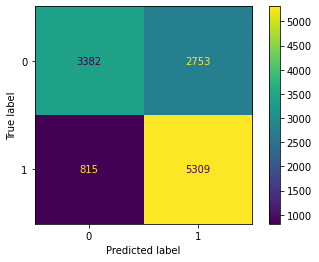

In [27]:
functions.plot_results(y_train, y_pred)